A Fashion Recommendation System using Image Features leverages computer vision and machine learning techniques to analyze fashion items’ visual aspects (like colour, texture, and style) and recommend similar or complementary products to users. So, if you want to learn how to build a Fashion Recommendation System by utilizing image features, this article is for you. In this article, I’ll take you through the task of building a Fashion Recommendation System utilizing Image Features using the Python programming language.

Fashion Recommendation System using Image Features: Process We Can Follow
Building a fashion recommendation system using image features involves several key steps, leveraging both computer vision and machine learning techniques. Below is a detailed process you can follow to build a fashion recommendation system using image features:

Assemble a diverse dataset of fashion items. This dataset should include a wide variety of items with different colours, patterns, styles, and categories.
Ensure all images are in a consistent format (e.g., JPEG, PNG) and resolution.
Implement a preprocessing function to prepare images for feature extraction.
Choose a pre-trained CNN model such as VGG16, ResNet, or InceptionV3. These models, pre-trained on large datasets like ImageNet, are capable of extracting powerful feature representations from images.
Pass each image through the CNN model to extract features.
Define a metric for measuring the similarity between feature vectors. 
Rank the dataset images based on their similarity to the input image and recommend the top N items that are most similar.
Implement a final function that encapsulates the entire process from pre-processing an input image, extracting features, computing similarities, and outputting recommendations.
So, the process starts with collecting a dataset of images based on fashionable outfits. I found an ideal dataset for this task. You can download the dataset from here.

Fashion Recommendation System using Image Features with Python
Now, let’s get started with the task of building a fashion recommendation system utilizing image features by importing the necessary Python libraries and the dataset:

In the above code, a zip file named ‘women fashion.zip’ located at the path: ‘/content/women fashion.zip’ on Google Colab is being extracted to a specified directory: ‘/content/women_fashion/’. Initially, we check if the extraction directory exists, and if it does not, the directory is created using os.makedirs(). Then, using Python’s ZipFile module, the zip file is opened in read mode, and its contents are extracted to the designated directory.

The zip file contains a directory named women fashion and some metadata used by macOS (__MACOSX). Let’s ignore the macOS metadata and focus on the women fashion directory, listing its contents to understand the types and number of images we have:

In [45]:
import os

# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = "/teamspace/studios/this_studio/ProjectIII/women_fashion"

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['chic and elegant outfit consisting of a pair of high-waisted wide-leg trousers paired with a long-sleeve sheer lace top.jpg',
  'white, intricately detailed top and a flowing dark blue skirt.jpg',
  'black top with spaghetti straps and a black skirt adorned with a fringe detail at the hem copy.jpg',
  'black floral saree.jpg',
  'flowing green off-shoulder dress.jpg',
  'sparkling, fitted dress with long sleeves.jpg',
  'Sleeveless-Ruched-Tight-Fashion-Sexy-Bodycon-Party-Women-Club-Dresses.webp',
  'shiny, silver, wrap-style dress with long sleeves.jpg',
  'glamorous two-piece outfit featuring a sequined design.jpeg',
  'black top with spaghetti straps and a black skirt adorned with a fringe detail at the hem.jpg'],
 99)

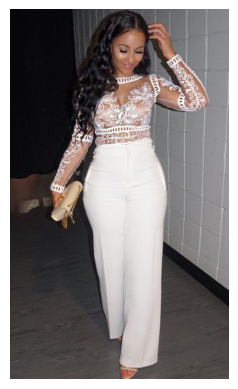

In [46]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics

    
# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

Now, we will create a list of all image file paths that will be used later in extracting the features from every image in the dataset:

In [47]:
import glob

# directory path containing your images
image_directory = '/teamspace/studios/this_studio/ProjectIII/women_fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['/teamspace/studios/this_studio/ProjectIII/women_fashion/chic and elegant outfit consisting of a pair of high-waisted wide-leg trousers paired with a long-sleeve sheer lace top.jpg', '/teamspace/studios/this_studio/ProjectIII/women_fashion/white, intricately detailed top and a flowing dark blue skirt.jpg', '/teamspace/studios/this_studio/ProjectIII/women_fashion/black top with spaghetti straps and a black skirt adorned with a fringe detail at the hem copy.jpg', '/teamspace/studios/this_studio/ProjectIII/women_fashion/black floral saree.jpg', '/teamspace/studios/this_studio/ProjectIII/women_fashion/flowing green off-shoulder dress.jpg', '/teamspace/studios/this_studio/ProjectIII/women_fashion/sparkling, fitted dress with long sleeves.jpg', '/teamspace/studios/this_studio/ProjectIII/women_fashion/Sleeveless-Ruched-Tight-Fashion-Sexy-Bodycon-Party-Women-Club-Dresses.webp', '/teamspace/studios/this_studio/ProjectIII/women_fashion/shiny, silver, wrap-style dress with long sleeves.jpg', '/t

In the above code, the glob module is used to generate a list of file paths for images stored in the directory. The glob.glob function searches for files that match a specified pattern, in this case, *.*, which matches all files within the directory. The list comprehension then filters these files to include only those with specific image file extensions (.jpg, .png, .jpeg, .webp). 

It ensures that image_paths_list contains paths to only the image files, excluding any other file types that might be present in the directory.

Now, we will extract features from all the fashion images:

In [48]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In the above code, a feature extraction process is implemented using the VGG16 model, a popular convolutional neural network pre-trained on the ImageNet dataset, to extract visual features from images stored in image_paths_list.

Initially, the VGG16 model is loaded without its top classification layer (include_top=False), making it suitable for feature extraction rather than classification. Each image path from image_paths_list is processed through a series of steps: the image is loaded and resized to 224×224 pixels to match the VGG16 input size requirements, converted to a NumPy array, and preprocessed to fit the model’s expected input format.

The preprocessed images are then fed into the VGG16 model to extract features, which are subsequently flattened and normalized to create a consistent feature vector for each image. These feature vectors (all_features) and their corresponding image filenames (all_image_names) are stored, providing a structured dataset for the next steps in building a fashion recommendation system using image features.

Now, I’ll write a function to recommend fashion images based on image features:

In [49]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]
    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/teamspace/studios/this_studio/ProjectIII/women_fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')


In the above code, we defined a function recommend_fashion_items_cnn, which recommends fashion items similar to a given input image using deep learning-based feature extraction. It utilizes the VGG16 model to extract high-dimensional feature vectors from images, capturing their visual essence.

For a specified input image, the function preprocesses the image, extracts its features, and calculates the cosine similarity between this feature vector and those of other images in the dataset (all_features). It ranks these images based on similarity and selects the top N most similar images to recommend, explicitly excluding the input image from being recommended to itself by filtering out its index from the list of similar indices.

In the end, the function will visualize the input image and its recommendations by displaying them.

Now, here’s how we can use this function to recommend images based on a similar fashion in the input image:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


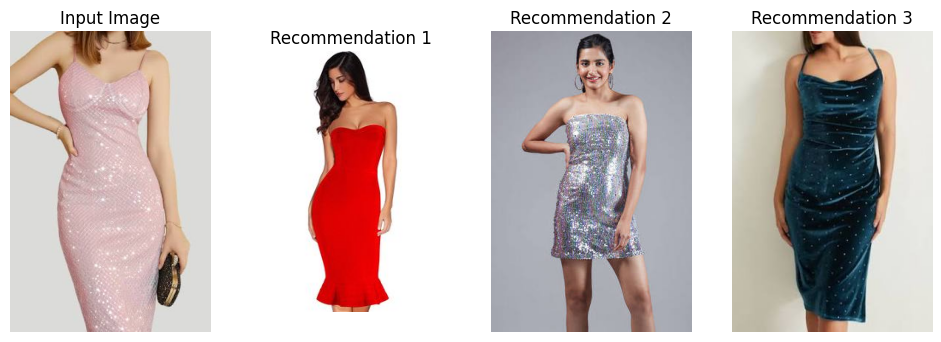

In [50]:
input_image_path = "/teamspace/studios/this_studio/ProjectIII/women_fashion/pink, knee-length dress that sparkles.jpg"
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)